In [24]:
from __future__ import division

%matplotlib inline
import pandas as pd
import thinkdsp
import thinkplot
import autocorr
import numpy as np

In [25]:
meg_data_file_names = ['data/meg_walking.csv','data/meg_jogging.csv','data/meg_upstairs.csv','data/meg_downstairs.csv']
meg_data_dict = {}
activites = ['walking', 'jogging', 'upstairs', 'downstairs']
for i,file in enumerate(meg_data_file_names):
    df = pd.read_csv(file)
    meg_data_dict[activites[i]] = df
print meg_data_dict

{'walking':              x          y         z           time
0     1.310227   5.982512  7.183204  1430007227602
1     1.356914   5.880758  7.053917  1430007227733
2     1.315015   6.165668  7.748834  1430007227877
3     0.656011   5.772420  7.258022  1430007228058
4    -1.922544   5.136161  6.883330  1430007228239
5    -0.724845   6.194398  7.310695  1430007228418
6    -0.593164   6.199187  6.927623  1430007228598
7    -0.318429   6.206369  7.368156  1430007228780
8    -0.296282   6.321889  6.959346  1430007228960
9    -0.325013   6.285378  7.171831  1430007229139
10   -0.153827   6.386533  7.010821  1430007229319
11   -0.003591   6.422446  6.855198  1430007229499
12   -0.035913   6.312912  7.300520  1430007229679
13   -0.014964   6.448183  6.934805  1430007229859
14   -0.031723   6.433220  6.840833  1430007230040
15   -0.059256   6.418855  6.900089  1430007230220
16   -0.025738   6.350620  6.952163  1430007230400
17    0.062249   6.478111  6.888118  1430007230580
18   -0.007183   6.

In [26]:
def evenly_sample_ts(ts):
    return np.linspace(ts.min(), ts.max(), len(ts))

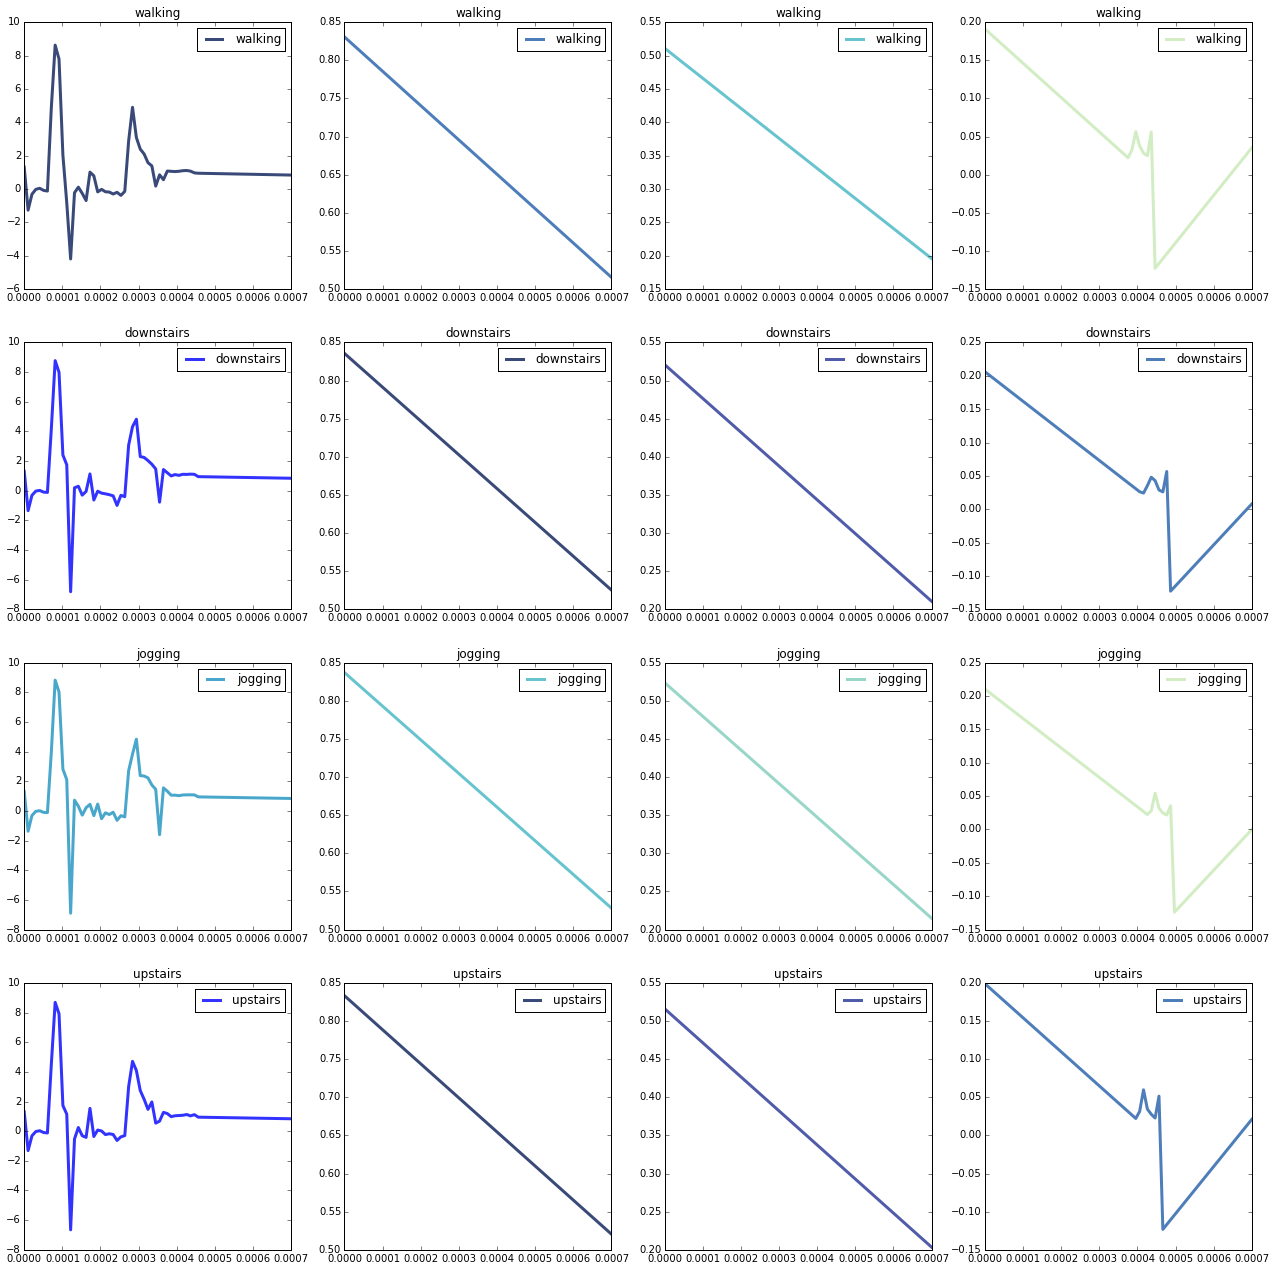

In [42]:
thinkplot.preplot(4, 4, 4)

for plotnum, (activity, data) in enumerate(meg_data_dict.iteritems()):
    time = data.time.values
    vals = data.x.values
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals)
    zwave = thinkdsp.Wave(interp_vals, framerate=100000)
    
#     thinkplot.subplot(plotnum+1)
#     thinkplot.plot(evenly_sampled_ts, interp_vals)
#     thinkplot.config(title=activity)
    
    start0 = 0
    window_size = 0.0007
    seg_nums = 4
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        thinkplot.subplot(4*plotnum+1+i)
        zseg.plot(label=activity)
        thinkplot.Config(title=activity)